# A Data visualisation for the stats of a crappy game

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Overview

In [3]:
df = pd.read_csv("players.csv")
print(df.info())
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             25 non-null     int64 
 1   NAME           25 non-null     object
 2   NB_OF_PUNCHES  25 non-null     int64 
 3   BRICKS_BROKEN  25 non-null     int64 
 4   WALLS_PASSED   25 non-null     int64 
 5   MISS           25 non-null     int64 
 6   TIME           25 non-null     int64 
 7   LEVEL          25 non-null     object
 8   DIFFICULTY     25 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.9+ KB
None
              ID  NB_OF_PUNCHES  BRICKS_BROKEN  WALLS_PASSED        MISS  \
count  25.000000       25.00000      25.000000     25.000000   25.000000   
mean   13.000000       96.04000      55.400000     14.960000   18.680000   
std     7.359801       69.39109      15.030524      3.457841   34.674342   
min     1.000000       35.00000      29.000000      8.000000    0.

,ID,NAME,NB_OF_PUNCHES,BRICKS_BROKEN,WALLS_PASSED,MISS,TIME,LEVEL,DIFFICULTY
0,1,Aure,113,65,19,24,60200,endless,4
1,2,Aure,73,53,14,5,46600,endless,3
2,3,Aure,87,59,15,15,50800,endless,4
3,4,Aure,74,47,13,8,44200,endless,3
4,5,Aure,100,69,18,11,58600,endless,4


Since we are going to consider the caracteristics, skill and progress of each player, we are going to organise the dataframe by players.   
Taking the ID as a second sorting feature, to keep the attempts chronologically ordered.

In [4]:
df = df.sort_values(by= ["NAME", "ID"])
players = df["NAME"].unique()
len(players)

5

Here we have the data gathered from 5 players.        
Each player played 5 games.          

## Visualisation

firstly, we are going to look at the main progression feature: the number of walls passed,
- How the players compare regarding this metric
- The distribution of that feature

C:\Users\ilian\AppData\Local\Temp\ipykernel_8716\3106448130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players['NAME'], y=top_players['WALLS_PASSED'], palette='coolwarm')


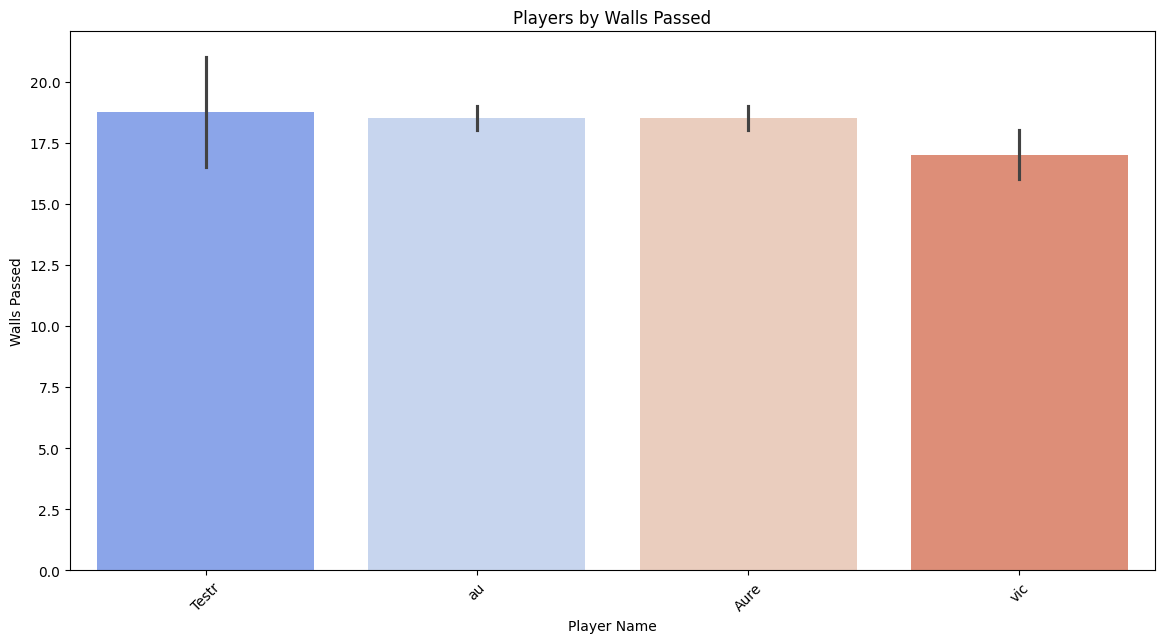

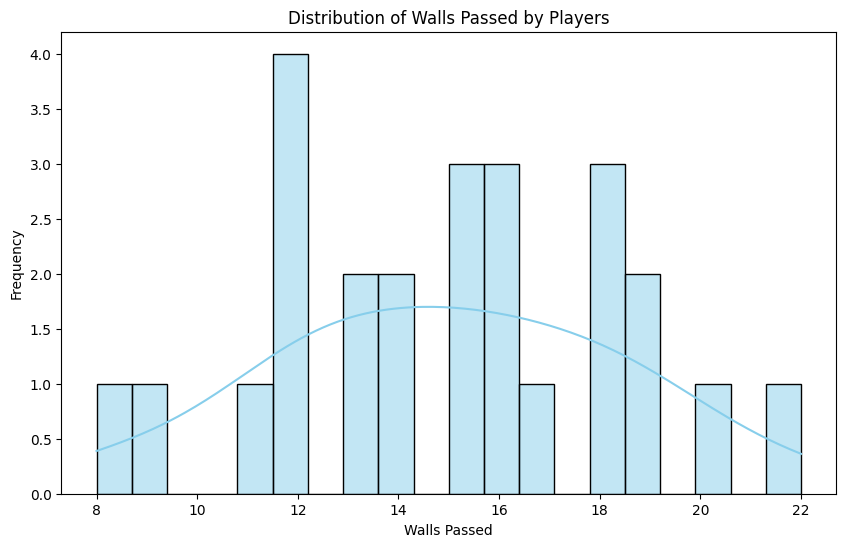

In [6]:
# Players by walls passed
top_players = df.sort_values(by='WALLS_PASSED', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_players['NAME'], y=top_players['WALLS_PASSED'], palette='coolwarm')
plt.title('Players by Walls Passed')
plt.xlabel('Player Name')
plt.ylabel('Walls Passed')
plt.xticks(rotation=45)
plt.show()

# Distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['WALLS_PASSED'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Walls Passed by Players')
plt.xlabel('Walls Passed')
plt.ylabel('Frequency')
plt.show()

Here, we notice that although the players have near to no difference in their performance,    
the distribution of walls passed by game ressembles a normal distribution.      
Possibly implying that every player has overall the same chance of succes over the game regardless of skill.   
Meaning that the game might be too random or not giving enough cues to the player, to show an expression of skill.

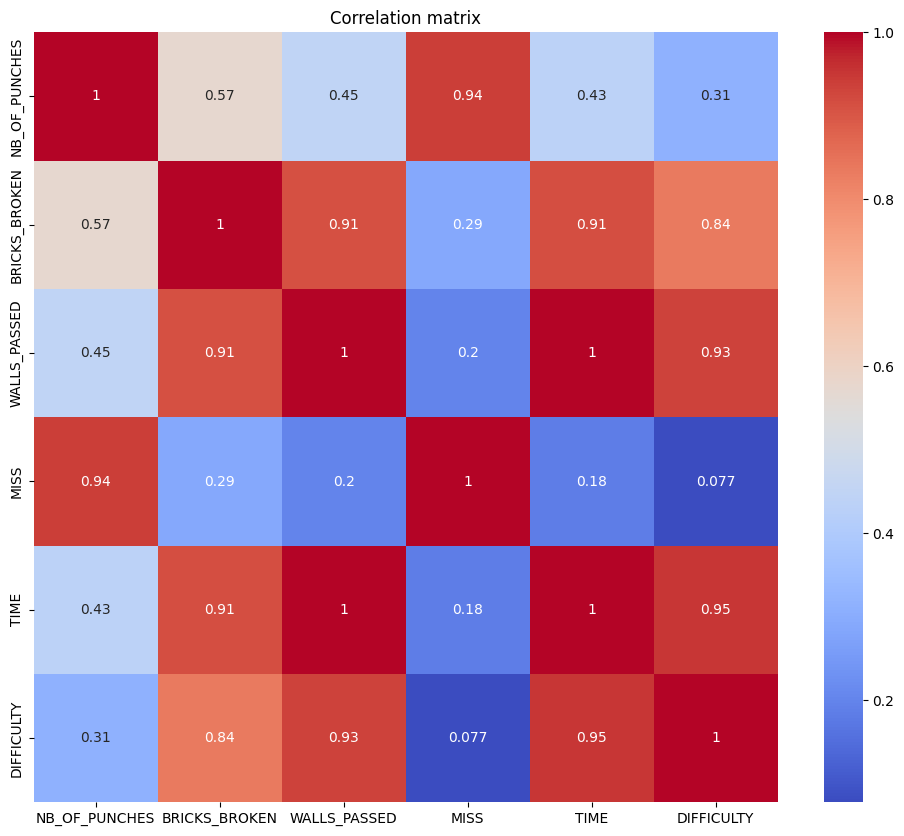

In [9]:
numeric_cols = ['NB_OF_PUNCHES', 'BRICKS_BROKEN', 'WALLS_PASSED', 'MISS', 'TIME', 'DIFFICULTY' ]

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

The heatmap presents a lot of higly correlated features,  
However, looking closer, we quickly realise that these correlations were to be expected, giving no real insights.  
As most of those features describe the same thing.  
- The number of walls passed are higly correlated to the total time, as every wall comes with a fixed, predetermined timeframe to pass it.  
- The difficulty naturally increases with time
- Each wall comes with a certain amount of bricks to break
As the game goes on: "time", "difficulty", "walls passed" and "bricks broken" are expected to increase very closely

However, two features do not follow this trend: "number of punches" and "missed punches"
let's look at the possible trends between "number of punches" and "bricks broken", "walls passed"

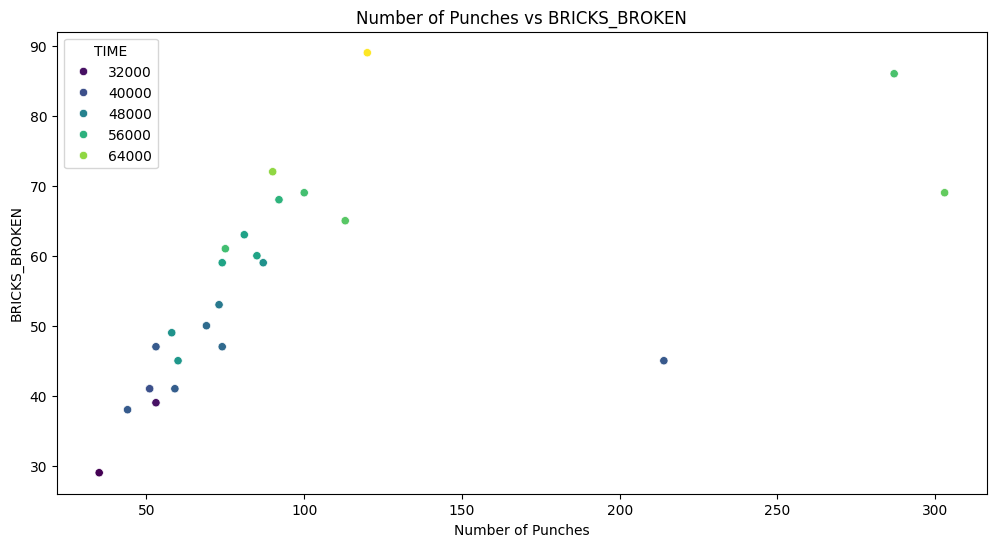

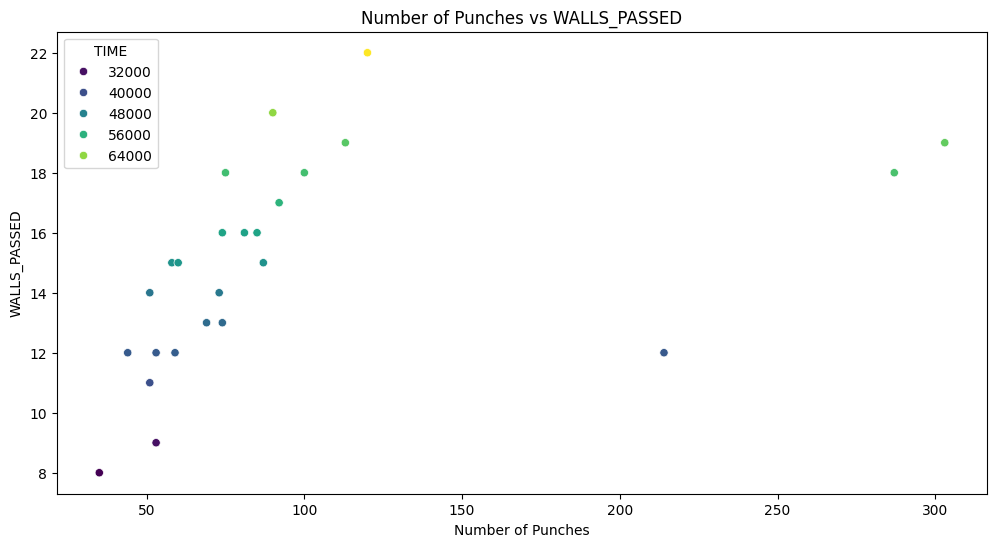

In [11]:
# plots of nb of punches to other features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='NB_OF_PUNCHES', y='BRICKS_BROKEN', data=df, hue='TIME', palette='viridis')
plt.title(f'Number of Punches vs BRICKS_BROKEN')
plt.xlabel('Number of Punches')
plt.ylabel('BRICKS_BROKEN')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='NB_OF_PUNCHES', y='WALLS_PASSED', data=df, hue='TIME', palette='viridis')
plt.title(f'Number of Punches vs WALLS_PASSED')
plt.xlabel('Number of Punches')
plt.ylabel('WALLS_PASSED')
plt.show()


Looking at those scatterplots, we could see what ressembles two lines trending up on each plot,   
one with significantly less points than the other, making them outliers.    
These points could be the result of a strategy based on spamming the punch command, as missing isn't penalised